In [2]:
import pandas as pd
import numpy as np 


In [3]:
df = pd.read_excel("2025CountyHealthRankingsDatav3.xlsx" , sheet_name = "Select Measure Data" , header = 1)

In [3]:
df.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,National Z-Score,YPLL Rate (Hispanic (all races)),...,Injury Death Rate (Non-Hispanic 2+ races) 95% CI - Low,Injury Death Rate (Non-Hispanic 2+ races) 95% CI - High,Injury Death Rate (Non-Hispanic White),Injury Death Rate (Non-Hispanic White) 95% CI - Low,Injury Death Rate (Non-Hispanic White) 95% CI - High,# Associations,Social Association Rate,National Z-Score.27,% Household Income Required for Child Care Expenses,National Z-Score.28
0,1000,Alabama,NaN,NaN,102760.0,11853.247248,11744.014820,11962.479676,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5916.0,11.658760,NaN,25.547114,NaN
1,1001,Alabama,Autauga,NaN,1008.0,9938.263382,9021.297133,10855.229632,-0.144182,NaN,...,NaN,NaN,66.353516,55.322574,77.384459,67.0,11.211700,0.043429,21.835108,-0.961825
2,1003,Alabama,Baldwin,NaN,3944.0,8957.112686,8499.339223,9414.886148,-0.400274,4636.48424,...,NaN,NaN,86.954622,81.060141,92.849104,239.0,9.698298,0.308739,19.354057,-1.316051
3,1005,Alabama,Barbour,NaN,587.0,12738.656137,11133.499025,14343.813250,0.586752,NaN,...,NaN,NaN,92.500356,69.083690,121.301910,22.0,8.904720,0.447859,28.579628,0.001105
4,1007,Alabama,Bibb,NaN,509.0,11708.948038,10166.716823,13251.179253,0.317987,NaN,...,NaN,NaN,110.157489,88.691939,135.248986,19.0,8.634401,0.495248,26.582776,-0.283990


In [5]:
df.describe()

,FIPS,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,National Z-Score,YPLL Rate (Hispanic (all races)),YPLL Rate (Hispanic (all races)) 95% CI - Low,YPLL Rate (Hispanic (all races)) 95% CI - High,YPLL Rate (Hispanic (all races)) Unreliable,...,Injury Death Rate (Non-Hispanic 2+ races) 95% CI - Low,Injury Death Rate (Non-Hispanic 2+ races) 95% CI - High,Injury Death Rate (Non-Hispanic White),Injury Death Rate (Non-Hispanic White) 95% CI - Low,Injury Death Rate (Non-Hispanic White) 95% CI - High,# Associations,Social Association Rate,National Z-Score.27,% Household Income Required for Child Care Expenses,National Z-Score.28
count,3210.000000,2956.000000,2956.000000,2956.000000,2956.000000,3089.000000,839.000000,839.000000,839.000000,0.0,...,0.0,0.0,1580.000000,1580.000000,1580.000000,3195.000000,3195.000000,3089.000000,3192.000000,3089.000000
mean,30260.285358,3220.144790,10460.525124,8947.807044,12018.097031,-0.024411,7433.900088,5927.045462,9201.038863,NaN,...,NaN,NaN,107.576239,90.274910,127.589053,186.403130,11.316263,0.013671,28.616898,-0.000847
std,15228.928422,17671.376075,3813.339710,3320.777261,4531.959277,0.896805,2496.946220,2094.416680,3250.371504,NaN,...,NaN,NaN,30.763612,25.838364,42.657176,1022.286027,5.873469,0.943367,7.024232,0.994960
min,1000.000000,50.000000,3315.252949,2280.399158,3554.778059,-1.872863,2858.042430,2014.692076,3891.842603,NaN,...,NaN,NaN,29.251292,21.065563,33.207613,0.000000,0.000000,-3.394213,12.270692,-2.327358
25%,18151.500000,271.000000,7826.233714,6583.965562,8945.057449,-0.676629,5692.377267,4527.702388,6839.478614,NaN,...,NaN,NaN,87.087416,72.881719,98.241986,12.000000,7.887962,-0.470469,23.427124,-0.736365
50%,29162.000000,583.500000,9874.015936,8521.882024,11368.552085,-0.137667,6931.108777,5511.729164,8522.837824,NaN,...,NaN,NaN,105.274931,88.210255,122.445833,29.000000,10.705255,0.118072,27.907778,-0.102339
75%,45070.500000,1441.500000,12435.128429,10753.810720,14313.326388,0.481094,8684.624752,6934.950001,10877.007867,NaN,...,NaN,NaN,124.665787,104.512572,148.890499,80.000000,14.073318,0.605130,32.954435,0.620117
max,56045.000000,442212.000000,46417.851928,36447.024051,59163.362700,4.531354,21113.831075,19010.897443,23216.764707,NaN,...,NaN,NaN,300.229122,243.237781,418.490880,24087.000000,59.612519,2.008920,65.172517,5.225553


In [6]:
df.shape

(3210, 225)

In [7]:
null_count = df.isnull().sum()

In [8]:
null_cols_gt_700 = list(null_count[df.isnull().sum()>700].index)

In [9]:
df_removed_null_gt_700 = df.drop(axis = 1 , columns = null_cols_gt_700)

In [10]:
df_removed_null_gt_700.isnull().sum()

FIPS                                                     0
State                                                    0
County                                                  51
Deaths                                                 254
Years of Potential Life Lost Rate                      254
                                                      ... 
# Associations                                          15
Social Association Rate                                 15
National Z-Score.27                                    121
% Household Income Required for Child Care Expenses     18
National Z-Score.28                                    121
Length: 119, dtype: int64

In [11]:
new_df = df_removed_null_gt_700

In [12]:
new_df.describe()

,FIPS,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,National Z-Score,Average Number of Physically Unhealthy Days,95% CI - Low.1,95% CI - High.1,National Z-Score.1,...,# Injury Deaths,Injury Death Rate,95% CI - Low.13,95% CI - High.13,National Z-Score.26,# Associations,Social Association Rate,National Z-Score.27,% Household Income Required for Child Care Expenses,National Z-Score.28
count,3210.000000,2956.000000,2956.000000,2956.000000,2956.000000,3089.000000,3195.000000,3195.000000,3195.000000,3089.000000,...,3094.000000,3094.000000,3094.000000,3094.000000,3089.000000,3195.000000,3195.000000,3089.000000,3192.000000,3089.000000
mean,30260.285358,3220.144790,10460.525124,8947.807044,12018.097031,-0.024411,4.449345,3.632285,5.339421,-0.001281,...,891.111183,99.683967,81.485956,121.241110,-0.010999,186.403130,11.316263,0.013671,28.616898,-0.000847
std,15228.928422,17671.376075,3813.339710,3320.777261,4531.959277,0.896805,0.663149,0.574045,0.769289,0.995530,...,4880.341670,29.880445,25.772234,40.896241,0.944618,1022.286027,5.873469,0.943367,7.024232,0.994960
min,1000.000000,50.000000,3315.252949,2280.399158,3554.778059,-1.872863,2.776126,2.156193,3.273307,-2.562793,...,10.000000,27.747589,17.778404,31.211419,-2.399935,0.000000,0.000000,-3.394213,12.270692,-2.327358
25%,18151.500000,271.000000,7826.233714,6583.965562,8945.057449,-0.676629,3.943543,3.209620,4.761253,-0.753571,...,60.000000,79.293849,63.895084,94.235876,-0.668953,12.000000,7.887962,-0.470469,23.427124,-0.736365
50%,29162.000000,583.500000,9874.015936,8521.882024,11368.552085,-0.137667,4.413705,3.602590,5.308101,-0.048146,...,138.000000,96.749387,78.725134,116.005051,-0.094427,29.000000,10.705255,0.118072,27.907778,-0.102339
75%,45070.500000,1441.500000,12435.128429,10753.810720,14313.326388,0.481094,4.894083,4.019275,5.848945,0.667460,...,367.500000,114.983264,95.878919,141.128188,0.511075,80.000000,14.073318,0.605130,32.954435,0.620117
max,56045.000000,442212.000000,46417.851928,36447.024051,59163.362700,4.531354,7.532361,6.323262,8.828221,3.519873,...,123781.000000,311.742293,236.633760,492.687223,4.650907,24087.000000,59.612519,2.008920,65.172517,5.225553


In [13]:
numerical_cols = new_df.select_dtypes(include = [np.number])
categorical_cols = new_df.select_dtypes(exclude = [np.number])

In [14]:
list(numerical_cols.columns)

['FIPS',
 'Deaths',
 'Years of Potential Life Lost Rate',
 '95% CI - Low',
 '95% CI - High',
 'National Z-Score',
 'Average Number of Physically Unhealthy Days',
 '95% CI - Low.1',
 '95% CI - High.1',
 'National Z-Score.1',
 '% Low Birth Weight',
 '95% CI - Low.2',
 '95% CI - High.2',
 'National Z-Score.2',
 'Average Number of Mentally Unhealthy Days',
 '95% CI - Low.3',
 '95% CI - High.3',
 'National Z-Score.3',
 '% Fair or Poor Health',
 '95% CI - Low.4',
 '95% CI - High.4',
 'National Z-Score.4',
 '% Vaccinated',
 'National Z-Score.5',
 '% With Access to Exercise Opportunities',
 'National Z-Score.6',
 'Food Environment Index',
 'National Z-Score.7',
 '# Primary Care Physicians',
 'Primary Care Physicians Rate',
 'National Z-Score.8',
 '# Mental Health Providers',
 'Mental Health Provider Rate',
 'National Z-Score.9',
 '# Dentists',
 'Dentist Rate',
 'National Z-Score.10',
 'Preventable Hospitalization Rate',
 'National Z-Score.11',
 '% with Annual Mammogram',
 'National Z-Score.12'

In [15]:
len(numerical_cols.columns)

113

In [16]:
len(categorical_cols.columns)

6

In [17]:
print("Categorical Columsn : \n",categorical_cols.columns)

Categorical Columsn : 
 Index(['State', 'County', 'Primary Care Physicians Ratio',
       'Mental Health Provider Ratio', 'Dentist Ratio',
       'Presence of Water Violation'],
      dtype='object')


In [18]:
new_df = new_df.drop(columns = ['FIPS' , 'State' , 'County'])

In [19]:
cols = [x for x in new_df.columns if '95% CI' in x or 'National Z-Score' in x]

In [20]:
new_df = new_df.drop(columns = cols)

In [21]:
new_df.nunique().sort_values()

Presence of Water Violation                               2
% with Annual Mammogram                                  57
% Vaccinated                                             65
Food Environment Index                                   84
Average Daily PM2.5                                     153
% Fair or Poor Health                                   254
% Children in Poverty                                   395
# Dentists                                              444
# Primary Care Physicians                               450
# Associations                                          495
% Long Commute - Drives Alone                           572
# Mental Health Providers                               791
# Injury Deaths                                         972
# Unemployed                                           1627
Deaths                                                 1676
Mental Health Provider Ratio                           1717
Preventable Hospitalization Rate        

In [22]:
new_df = new_df.drop(columns = ['Presence of Water Violation'])

In [23]:
len(new_df.columns)

52

In [24]:
new_df.isnull().sum().sort_values(ascending = False)

% Children in Poverty (White)                          542
Deaths                                                 254
Years of Potential Life Lost Rate                      254
Mental Health Provider Ratio                           186
Mental Health Provider Rate                            186
# Mental Health Providers                              186
# Primary Care Physicians                              173
Primary Care Physicians Rate                           173
Primary Care Physicians Ratio                          173
Visits per service area population                     144
# Injury Deaths                                        116
% Low Birth Weight                                     116
Injury Death Rate                                      116
# Dentists                                             103
Dentist Rate                                           103
Dentist Ratio                                          103
Average Daily PM2.5                                     

In [25]:
final_df = new_df.dropna()

In [26]:
final_df

,Deaths,Years of Potential Life Lost Rate,Average Number of Physically Unhealthy Days,% Low Birth Weight,Average Number of Mentally Unhealthy Days,% Fair or Poor Health,% Vaccinated,% With Access to Exercise Opportunities,Food Environment Index,# Primary Care Physicians,...,80th Percentile Income,20th Percentile Income,Income Ratio,% Children in Poverty,% Children in Poverty (White),# Injury Deaths,Injury Death Rate,# Associations,Social Association Rate,% Household Income Required for Child Care Expenses
1,1008.0,9938.263382,4.300364,9.995826,5.832901,17.7,36.0,54.491965,6.8,26.0,...,132562.0,31018.0,4.273712,17.0,8.265374,189.0,65.975725,67.0,11.211700,21.835108
2,3944.0,8957.112686,3.876436,8.133286,6.020778,17.0,44.0,61.624390,7.4,150.0,...,141920.0,32554.0,4.359526,14.1,6.865478,953.0,82.420053,239.0,9.698298,19.354057
3,587.0,12738.656137,5.431030,12.454212,6.339986,28.4,39.0,54.858661,6.2,10.0,...,99138.0,17658.0,5.614339,34.8,3.846154,106.0,85.603993,22.0,8.904720,28.579628
4,509.0,11708.948038,5.055619,10.017472,6.565945,25.1,31.0,43.390302,7.3,15.0,...,102593.0,19188.0,5.346727,21.4,23.948926,111.0,99.630201,19.0,8.634401,26.582776
5,1273.0,11898.088409,4.802400,7.646305,6.448702,22.6,37.0,42.292082,7.4,12.0,...,117729.0,25484.0,4.619722,16.6,12.320368,287.0,98.254695,44.0,7.393467,25.313260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,474.0,7530.130243,3.612632,7.598784,5.075774,13.5,40.0,66.861329,7.7,39.0,...,135298.0,30013.0,4.507980,11.8,10.367633,135.0,90.924398,47.0,15.400747,22.488270
3204,111.0,8608.432583,3.555536,10.183639,5.025165,12.6,40.0,54.136114,8.2,3.0,...,143826.0,32246.0,4.460274,8.2,6.096832,44.0,93.696763,5.0,5.705809,20.484038
3205,710.0,10209.647523,3.834421,10.179104,5.131034,15.9,39.0,92.621593,7.7,18.0,...,142407.0,31471.0,4.525023,11.5,16.887149,228.0,108.043559,33.0,7.981618,24.469532
3206,123.0,4173.600426,3.044909,7.748344,4.553103,10.6,56.0,99.228494,8.7,22.0,...,232512.0,57929.0,4.013741,5.7,3.888025,64.0,54.745774,48.0,20.612359,19.318356


In [27]:
final_df.dtypes

Deaths                                                 float64
Years of Potential Life Lost Rate                      float64
Average Number of Physically Unhealthy Days            float64
% Low Birth Weight                                     float64
Average Number of Mentally Unhealthy Days              float64
% Fair or Poor Health                                  float64
% Vaccinated                                           float64
% With Access to Exercise Opportunities                float64
Food Environment Index                                 float64
# Primary Care Physicians                              float64
Primary Care Physicians Rate                           float64
Primary Care Physicians Ratio                           object
# Mental Health Providers                              float64
Mental Health Provider Rate                            float64
Mental Health Provider Ratio                            object
# Dentists                                             

In [28]:
numerical_cols = final_df.select_dtypes(include = [np.number])
categorical_cols = final_df.select_dtypes(exclude = [np.number])

In [29]:
numerical_cols

,Deaths,Years of Potential Life Lost Rate,Average Number of Physically Unhealthy Days,% Low Birth Weight,Average Number of Mentally Unhealthy Days,% Fair or Poor Health,% Vaccinated,% With Access to Exercise Opportunities,Food Environment Index,# Primary Care Physicians,...,80th Percentile Income,20th Percentile Income,Income Ratio,% Children in Poverty,% Children in Poverty (White),# Injury Deaths,Injury Death Rate,# Associations,Social Association Rate,% Household Income Required for Child Care Expenses
1,1008.0,9938.263382,4.300364,9.995826,5.832901,17.7,36.0,54.491965,6.8,26.0,...,132562.0,31018.0,4.273712,17.0,8.265374,189.0,65.975725,67.0,11.211700,21.835108
2,3944.0,8957.112686,3.876436,8.133286,6.020778,17.0,44.0,61.624390,7.4,150.0,...,141920.0,32554.0,4.359526,14.1,6.865478,953.0,82.420053,239.0,9.698298,19.354057
3,587.0,12738.656137,5.431030,12.454212,6.339986,28.4,39.0,54.858661,6.2,10.0,...,99138.0,17658.0,5.614339,34.8,3.846154,106.0,85.603993,22.0,8.904720,28.579628
4,509.0,11708.948038,5.055619,10.017472,6.565945,25.1,31.0,43.390302,7.3,15.0,...,102593.0,19188.0,5.346727,21.4,23.948926,111.0,99.630201,19.0,8.634401,26.582776
5,1273.0,11898.088409,4.802400,7.646305,6.448702,22.6,37.0,42.292082,7.4,12.0,...,117729.0,25484.0,4.619722,16.6,12.320368,287.0,98.254695,44.0,7.393467,25.313260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,474.0,7530.130243,3.612632,7.598784,5.075774,13.5,40.0,66.861329,7.7,39.0,...,135298.0,30013.0,4.507980,11.8,10.367633,135.0,90.924398,47.0,15.400747,22.488270
3204,111.0,8608.432583,3.555536,10.183639,5.025165,12.6,40.0,54.136114,8.2,3.0,...,143826.0,32246.0,4.460274,8.2,6.096832,44.0,93.696763,5.0,5.705809,20.484038
3205,710.0,10209.647523,3.834421,10.179104,5.131034,15.9,39.0,92.621593,7.7,18.0,...,142407.0,31471.0,4.525023,11.5,16.887149,228.0,108.043559,33.0,7.981618,24.469532
3206,123.0,4173.600426,3.044909,7.748344,4.553103,10.6,56.0,99.228494,8.7,22.0,...,232512.0,57929.0,4.013741,5.7,3.888025,64.0,54.745774,48.0,20.612359,19.318356


In [30]:
categorical_cols

,Primary Care Physicians Ratio,Mental Health Provider Ratio,Dentist Ratio
1,2273:1,2743:1,3320:1
2,1595:1,828:1,2124:1
3,2496:1,3512:1,3088:1
4,1498:1,2734:1,4401:1
5,4920:1,3519:1,5951:1
...,...,...,...
3201,772:1,248:1,1387:1
3204,2899:1,897:1,2191:1
3205,2312:1,400:1,1654:1
3206,1072:1,155:1,931:1


In [31]:
final_df["Dentist Ratio"].dtype

dtype('O')

In [32]:
def clean_ratio(col):
    return (df[col]
            .astype(str)                   # ensure string
            .str.replace(',', '', regex=True)  # remove commas
            .str.extract(r'(\d+\.?\d*)')[0]   # extract number
            .astype(float))

In [33]:
for col in categorical_cols:
    final_df[col] = clean_ratio(col)

/var/folders/qn/21jlp61550x3pjfn6vtf10zr0000gn/T/ipykernel_96512/2365095781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[col] = clean_ratio(col)
/var/folders/qn/21jlp61550x3pjfn6vtf10zr0000gn/T/ipykernel_96512/2365095781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[col] = clean_ratio(col)
/var/folders/qn/21jlp61550x3pjfn6vtf10zr0000gn/T/ipykernel_96512/2365095781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [34]:
final_df.columns

Index(['Deaths', 'Years of Potential Life Lost Rate',
       'Average Number of Physically Unhealthy Days', '% Low Birth Weight',
       'Average Number of Mentally Unhealthy Days', '% Fair or Poor Health',
       '% Vaccinated', '% With Access to Exercise Opportunities',
       'Food Environment Index', '# Primary Care Physicians',
       'Primary Care Physicians Rate', 'Primary Care Physicians Ratio',
       '# Mental Health Providers', 'Mental Health Provider Rate',
       'Mental Health Provider Ratio', '# Dentists', 'Dentist Rate',
       'Dentist Ratio', 'Preventable Hospitalization Rate',
       '% with Annual Mammogram', '# Uninsured', '% Uninsured',
       '% Severe Housing Problems', 'Severe Housing Cost Burden',
       'Overcrowding', 'Inadequate Facilities', '% Drive Alone to Work',
       '# Workers who Drive Alone', '% Long Commute - Drives Alone',
       'Average Daily PM2.5', '% Households with Broadband Access',
       '# Households with Broadband Access',
       'Visi

In [35]:
import pandas as pd
import numpy as np

# First, let's see what we're working with
print("Available columns:")
print(final_df.columns.tolist())

# Check the '% Fair or Poor Health' column
print("\n'% Fair or Poor Health' statistics:")
print(final_df['% Fair or Poor Health'].describe())

# ============================================
# CREATE HEALTH_CLASS COLUMN
# ============================================

# Method 1: Using quantiles (divides data into equal groups)
final_df['Health_Class'] = pd.qcut(
    final_df['% Fair or Poor Health'], 
    q=3,  # Creates 3 categories
    labels=['Good Health', 'Fair Health', 'Poor Health']
)

# OR Method 2: Using custom thresholds
# Uncomment this if you prefer specific cutoffs:
"""
def categorize_health(pct):
    if pct < 15:
        return 'Good Health'
    elif pct < 20:
        return 'Fair Health'
    else:
        return 'Poor Health'

final_df['Health_Class'] = final_df['% Fair or Poor Health'].apply(categorize_health)
"""

# Verify the new column
print("\nHealth_Class created!")
print(final_df['Health_Class'].value_counts())
print("\nDistribution by percentage:")
print(final_df['Health_Class'].value_counts(normalize=True) * 100)

# Now check your columns again
print("\nUpdated columns:")
print(final_df.columns.tolist())

Available columns:
['Deaths', 'Years of Potential Life Lost Rate', 'Average Number of Physically Unhealthy Days', '% Low Birth Weight', 'Average Number of Mentally Unhealthy Days', '% Fair or Poor Health', '% Vaccinated', '% With Access to Exercise Opportunities', 'Food Environment Index', '# Primary Care Physicians', 'Primary Care Physicians Rate', 'Primary Care Physicians Ratio', '# Mental Health Providers', 'Mental Health Provider Rate', 'Mental Health Provider Ratio', '# Dentists', 'Dentist Rate', 'Dentist Ratio', 'Preventable Hospitalization Rate', '% with Annual Mammogram', '# Uninsured', '% Uninsured', '% Severe Housing Problems', 'Severe Housing Cost Burden', 'Overcrowding', 'Inadequate Facilities', '% Drive Alone to Work', '# Workers who Drive Alone', '% Long Commute - Drives Alone', 'Average Daily PM2.5', '% Households with Broadband Access', '# Households with Broadband Access', 'Visits per service area population', '# Some College', 'Population', '% Some College', '# Comple

/var/folders/qn/21jlp61550x3pjfn6vtf10zr0000gn/T/ipykernel_96512/1007711202.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Health_Class'] = pd.qcut(


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X = final_df.drop(columns=['% Fair or Poor Health', 'Health_Class'], errors='ignore')
y = final_df['Health_Class']

# Identify column types dynamically
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical:", categorical_features)
print("Numeric:", len(numeric_features), "columns")

# Build a fresh preprocessor that matches current X
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)


Categorical: []
Numeric: 51 columns


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8034557235421166

Classification Report:
               precision    recall  f1-score   support

 Fair Health       0.67      0.75      0.71       148
 Good Health       0.89      0.85      0.87       164
 Poor Health       0.86      0.81      0.83       151

    accuracy                           0.80       463
   macro avg       0.81      0.80      0.80       463
weighted avg       0.81      0.80      0.81       463


Confusion Matrix:
 [[111  17  20]
 [ 25 139   0]
 [ 29   0 122]]


In [45]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


svm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
])


svm_clf.fit(X_train, y_train)


y_pred = svm_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7883369330453563

Classification Report:
               precision    recall  f1-score   support

 Fair Health       0.66      0.72      0.69       152
 Good Health       0.85      0.79      0.82       156
 Poor Health       0.87      0.85      0.86       155

    accuracy                           0.79       463
   macro avg       0.79      0.79      0.79       463
weighted avg       0.79      0.79      0.79       463


Confusion Matrix:
 [[110  22  20]
 [ 33 123   0]
 [ 23   0 132]]


In [62]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler

# # --- Step 1: Prepare 2D version of data ---
# # Get numeric data only
# numeric_features = X.select_dtypes(include=['float64', 'int64'])

# # Scale features for PCA
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(numeric_features)

# # Reduce to 2D using PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # We'll use this as our visualization data
# X_vis = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# y_vis = y.values

# print("Explained variance by 2 PCs:", pca.explained_variance_ratio_.sum())

# # --- Step 2: Fit both models ---
# svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
# rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# svm_model.fit(X_vis, y_vis)
# rf_model.fit(X_vis, y_vis)

# # --- Step 3: Plot decision boundaries ---
# def plot_decision_boundary(model, title, ax):
#     # Mesh grid
#     h = 0.02
#     x_min, x_max = X_vis['PC1'].min() - 1, X_vis['PC1'].max() + 1
#     y_min, y_max = X_vis['PC2'].min() - 1, X_vis['PC2'].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
    
#     # Plot
#     ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
#     ax.scatter(X_vis['PC1'], X_vis['PC2'], c=y_vis, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#     ax.set_xlabel('Principal Component 1')
#     ax.set_ylabel('Principal Component 2')
#     ax.set_title(title)

# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# plot_decision_boundary(svm_model, "SVM Decision Boundary", axes[0])
# plot_decision_boundary(rf_model, "Random Forest Decision Boundary", axes[1])

# plt.tight_layout()
# plt.show()


binary health classification (Healthy county” vs “Unhealthy county”) 
Premature Mortality 
Infant Health Indicator 
Mental Health Burden 
Overall Health Quality

CORRELATION ANALYSIS

Health Class Encoding:
  Fair Health = 0
  Good Health = 1
  Poor Health = 2

Analyzing 53 numeric features

FEATURES CORRELATED WITH HEALTH_CLASS

🔴 MOST POSITIVELY CORRELATED (Higher value = Worse health):
Health_Class_Numeric                           1.000000
% Fair or Poor Health                          0.512866
% Children in Poverty                          0.422420
Average Number of Physically Unhealthy Days    0.411957
Years of Potential Life Lost Rate              0.389117
Income Ratio                                   0.307440
% Low Birth Weight                             0.307291
Average Number of Mentally Unhealthy Days      0.281550
% Uninsured                                    0.276298
Preventable Hospitalization Rate               0.237804
% Children in Poverty (White)                  0.233736
Overcrowding                                   0.183260
Dentist Ratio                                  0.170777
Injury Death Rate                         

/var/folders/qn/21jlp61550x3pjfn6vtf10zr0000gn/T/ipykernel_96512/116638318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Health_Class_Numeric'] = le.fit_transform(final_df['Health_Class'])


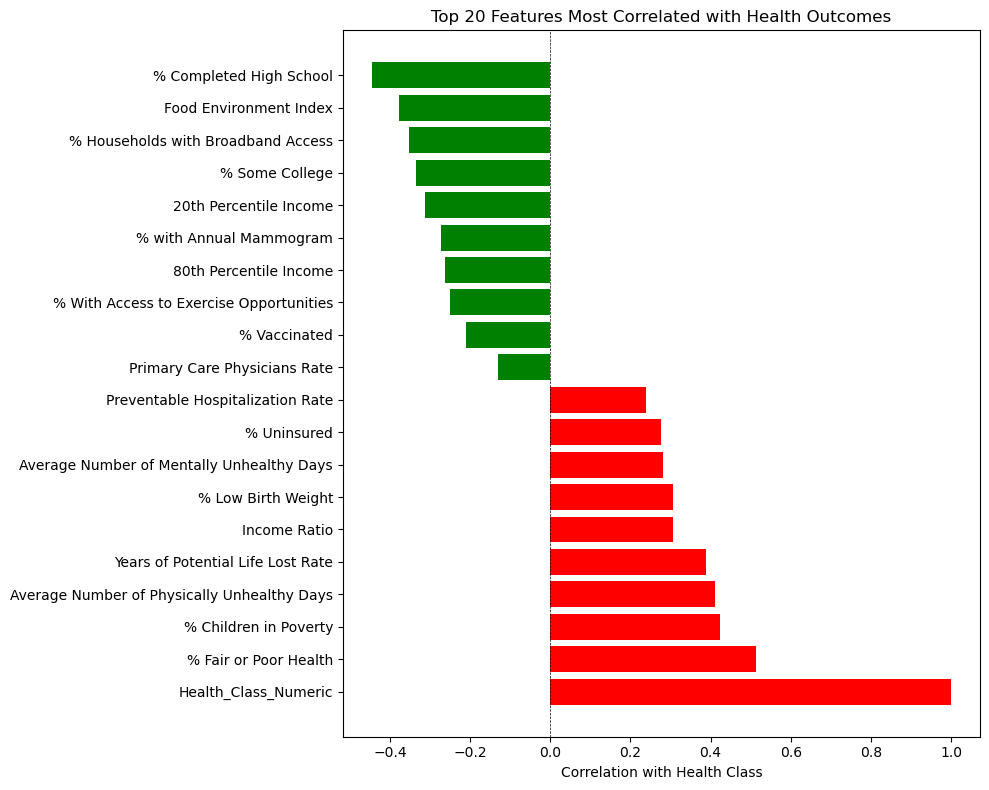


LOW-VALUE FEATURES (Can be removed)

Features with correlation < 0.1 (20 features):
% Severe Housing Problems                              0.096195
% Household Income Required for Child Care Expenses    0.049209
% Long Commute - Drives Alone                          0.038742
Severe Housing Cost Burden                             0.008669
Average Daily PM2.5                                    0.007414
Social Association Rate                               -0.045374
# Uninsured                                           -0.054142
# Unemployed                                          -0.072486
# Dentists                                            -0.080370
Population                                            -0.082403
# Mental Health Providers                             -0.086571
# Some College                                        -0.086697
Mental Health Provider Rate                           -0.088404
Population.1                                          -0.090104
# Primary Care Phys

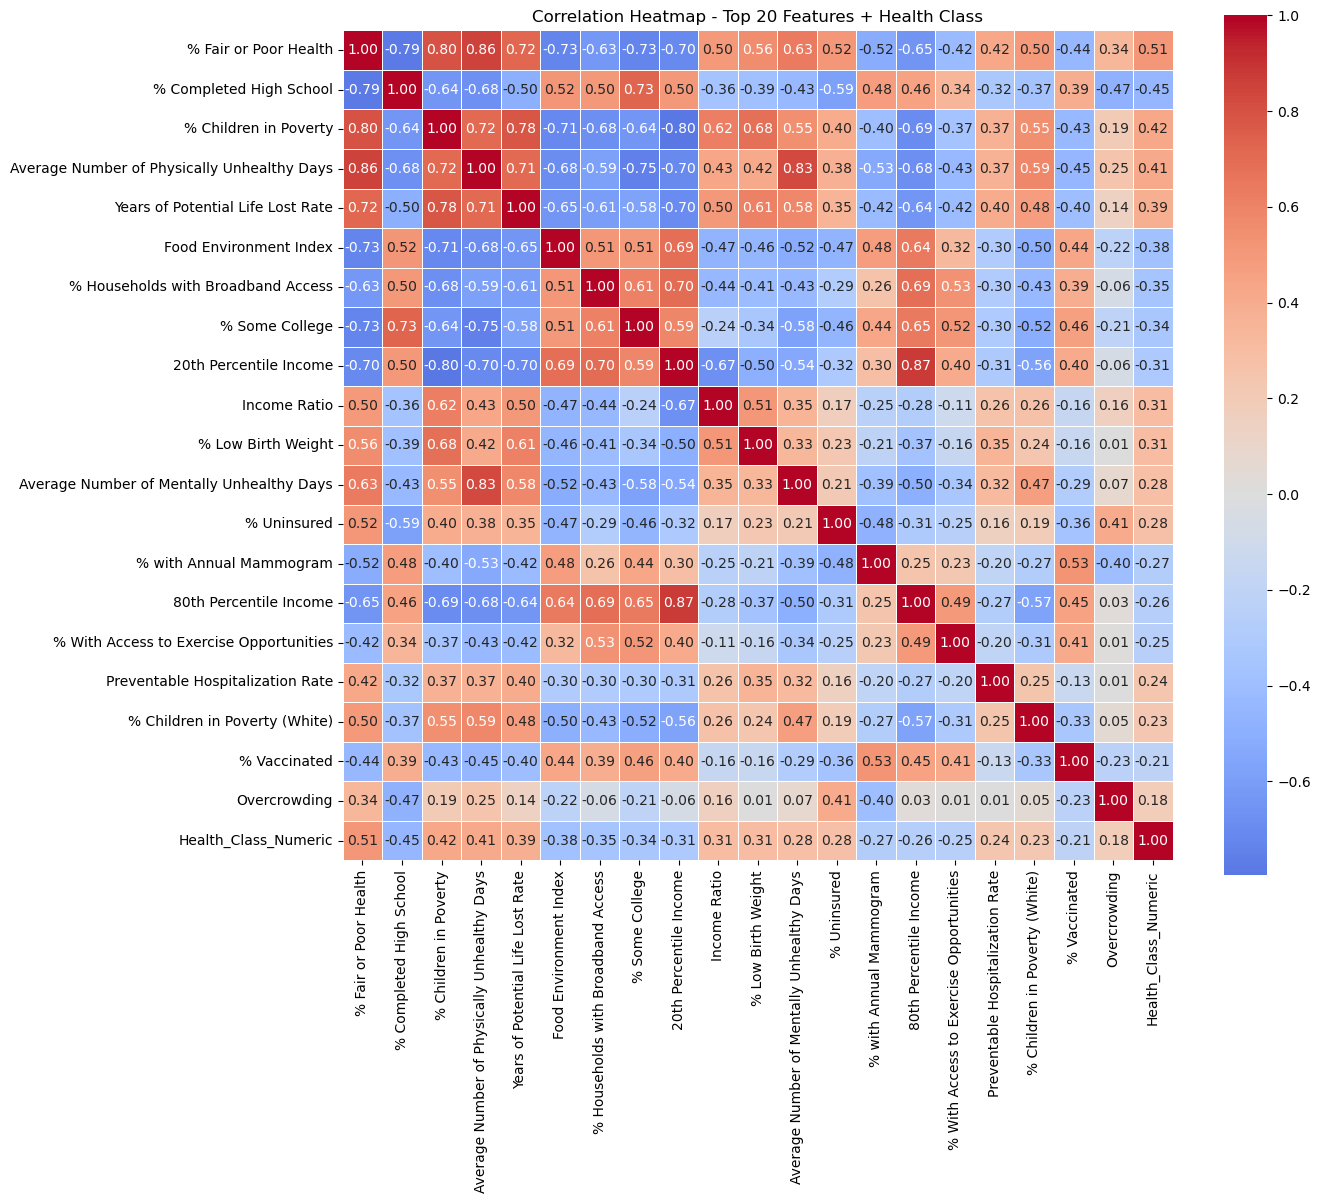


FEATURE SELECTION RECOMMENDATIONS

✅ KEEP these 11 strongly correlated features:
  - % Fair or Poor Health (corr: 0.513)
  - % Children in Poverty (corr: 0.422)
  - Average Number of Physically Unhealthy Days (corr: 0.412)
  - Years of Potential Life Lost Rate (corr: 0.389)
  - Income Ratio (corr: 0.307)
  - % Low Birth Weight (corr: 0.307)
  - 20th Percentile Income (corr: -0.312)
  - % Some College (corr: -0.335)
  - % Households with Broadband Access (corr: -0.353)
  - Food Environment Index (corr: -0.376)
  - % Completed High School (corr: -0.446)

❌ CONSIDER REMOVING these 20 weakly correlated features:
  - % Severe Housing Problems (corr: 0.096)
  - % Household Income Required for Child Care Expenses (corr: 0.049)
  - % Long Commute - Drives Alone (corr: 0.039)
  - Severe Housing Cost Burden (corr: 0.009)
  - Average Daily PM2.5 (corr: 0.007)
  - Social Association Rate (corr: -0.045)
  - # Uninsured (corr: -0.054)
  - # Unemployed (corr: -0.072)
  - # Dentists (corr: -0.080)
  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ============================================
# STEP 1: PREPARE DATA FOR CORRELATION
# ============================================
print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Encode Health_Class to numeric for correlation
le = LabelEncoder()
final_df['Health_Class_Numeric'] = le.fit_transform(final_df['Health_Class'])

print("\nHealth Class Encoding:")
for i, label in enumerate(le.classes_):
    print(f"  {label} = {i}")

# Select only numeric columns for correlation
numeric_df = final_df.select_dtypes(include=['float64', 'int64'])
print(f"\nAnalyzing {len(numeric_df.columns)} numeric features")

# ============================================
# STEP 2: CORRELATION WITH TARGET (Health_Class)
# ============================================
print("\n" + "="*60)
print("FEATURES CORRELATED WITH HEALTH_CLASS")
print("="*60)

# Calculate correlation with target
target_corr = numeric_df.corr()['Health_Class_Numeric'].sort_values(ascending=False)

print("\n🔴 MOST POSITIVELY CORRELATED (Higher value = Worse health):")
print(target_corr.head(15))

print("\n🟢 MOST NEGATIVELY CORRELATED (Higher value = Better health):")
print(target_corr.tail(15))

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_features = pd.concat([target_corr.head(10), target_corr.tail(10)])
colors = ['red' if x > 0 else 'green' for x in top_features.values]
plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Correlation with Health Class')
plt.title('Top 20 Features Most Correlated with Health Outcomes')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# ============================================
# STEP 3: FIND LOW-VALUE FEATURES
# ============================================
print("\n" + "="*60)
print("LOW-VALUE FEATURES (Can be removed)")
print("="*60)

# Features with very weak correlation (absolute value < 0.1)
weak_features = target_corr[abs(target_corr) < 0.1]
print(f"\nFeatures with correlation < 0.1 ({len(weak_features)} features):")
print(weak_features)

# ============================================
# STEP 4: FIND HIGHLY CORRELATED FEATURE PAIRS
# ============================================
print("\n" + "="*60)
print("HIGHLY CORRELATED FEATURE PAIRS (Redundant)")
print("="*60)

# Calculate full correlation matrix
corr_matrix = numeric_df.corr()

# Find pairs with correlation > 0.9 (excluding diagonal)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print(f"\n⚠️ Found {len(high_corr_pairs)} highly correlated pairs (>0.9):")
    pairs_df = pd.DataFrame(high_corr_pairs)
    print(pairs_df.to_string(index=False))
    print("\n💡 Recommendation: Keep only ONE feature from each pair")
else:
    print("\n✓ No highly correlated pairs found (>0.9)")

# ============================================
# STEP 5: CORRELATION HEATMAP (Top Features)
# ============================================
print("\n" + "="*60)
print("GENERATING CORRELATION HEATMAP")
print("="*60)

# Select top 20 most correlated features for visualization
top_20_features = abs(target_corr).sort_values(ascending=False).head(21).index.tolist()
top_20_features.remove('Health_Class_Numeric')  # Remove target itself

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    numeric_df[top_20_features + ['Health_Class_Numeric']].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title('Correlation Heatmap - Top 20 Features + Health Class')
plt.tight_layout()
plt.show()

# ============================================
# STEP 6: FEATURE SELECTION RECOMMENDATIONS
# ============================================
print("\n" + "="*60)
print("FEATURE SELECTION RECOMMENDATIONS")
print("="*60)

# Features to keep (strong correlation)
strong_features = target_corr[abs(target_corr) > 0.3].index.tolist()
if 'Health_Class_Numeric' in strong_features:
    strong_features.remove('Health_Class_Numeric')

# print(f"\n✅ KEEP these {len(strong_features)} strongly correlated features:")
# for feat in strong_features:
#     print(f"  - {feat} (corr: {target_corr[feat]:.3f})")

# Features to consider removing
# weak_remove = target_corr[abs(target_corr) < 0.1].index.tolist()
# if 'Health_Class_Numeric' in weak_remove:
    # weak_remove.remove('Health_Class_Numeric')

# print(f"\n❌ CONSIDER REMOVING these {len(weak_remove)} weakly correlated features:")
# for feat in weak_remove[:10]:  # Show first 10
    # print(f"  - {feat} (corr: {target_corr[feat]:.3f})")
# if len(weak_remove) > 10:
    # print(f"  ... and {len(weak_remove)-10} more")

# ============================================
# STEP 7: CREATE CLEANED FEATURE LIST
# ============================================
# print("\n" + "="*60)
# print("CREATING OPTIMIZED FEATURE SET")
# print("="*60)

# Remove redundant features from pairs
features_to_remove = set()
for pair in high_corr_pairs:
    feat1, feat2 = pair['Feature 1'], pair['Feature 2']
    # Keep the one more correlated with target
    if abs(target_corr[feat1]) > abs(target_corr[feat2]):
        features_to_remove.add(feat2)
    else:
        features_to_remove.add(feat1)

# Remove weak features
features_to_remove.update(weak_remove)

# Remove target encoding column
if 'Health_Class_Numeric' in features_to_remove:
    features_to_remove.remove('Health_Class_Numeric')

# Create final feature list
all_features = numeric_df.columns.tolist()
if 'Health_Class_Numeric' in all_features:
    all_features.remove('Health_Class_Numeric')

optimized_features = [f for f in all_features if f not in features_to_remove]

print(f"\n📊 SUMMARY:")
print(f"  Original features: {len(all_features)}")
print(f"  Features to remove: {len(features_to_remove)}")
print(f"  Optimized features: {len(optimized_features)}")

print(f"\n✨ Use these {len(optimized_features)} features for modeling:")
for i, feat in enumerate(optimized_features, 1):
    print(f"  {i}. {feat}")

# Save optimized feature list
optimized_features_list = optimized_features
print("\n✓ Optimized feature list saved in variable: optimized_features_list")

# ============================================
# BONUS: Variance Check
# ============================================
print("\n" + "="*60)
print("BONUS: LOW VARIANCE CHECK")
print("="*60)

# Check for features with very low variance
variances = numeric_df.var().sort_values()
low_var = variances[variances < 0.01]

if len(low_var) > 0:
    print(f"\n⚠️ Features with very low variance (<0.01):")
    print(low_var)
    print("\n💡 These features have little variation and might not be useful")
else:
    print("\n✓ All features have sufficient variance")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================================
# STEP 1: PREPARE DATA
# ============================================
print("="*60)
print("HEALTH PREDICTION MODEL - SIMPLE TRAINING")
print("="*60)

# Prepare features and target
X = final_df.drop(columns=['% Fair or Poor Health', 'Health_Class', 'Health_Class_Numeric'], errors='ignore')
y = final_df['Health_Class']

print(f"\nTotal Features: {len(X.columns)}")
print(f"Target Classes: {y.unique()}")
print(f"\nClass Distribution:")
print(y.value_counts())
print(f"\nTotal Samples: {len(X)}")

# ============================================
# STEP 2: IDENTIFY FEATURE TYPES
# ============================================
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f"\nCategorical Features: {len(categorical_features)}")
print(f"Numeric Features: {len(numeric_features)}")

# ============================================
# STEP 3: BUILD PREPROCESSOR
# ============================================
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# ============================================
# STEP 4: TRAIN-TEST SPLIT
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\nTraining Set: {len(X_train)} samples")
print(f"Test Set: {len(X_test)} samples")


HEALTH PREDICTION MODEL - SIMPLE TRAINING

Total Features: 51
Target Classes: ['Fair Health', 'Good Health', 'Poor Health']
Categories (3, object): ['Good Health' < 'Fair Health' < 'Poor Health']

Class Distribution:
Health_Class
Good Health    780
Poor Health    772
Fair Health    762
Name: count, dtype: int64

Total Samples: 2314

Categorical Features: 0
Numeric Features: 51

Training Set: 1851 samples
Test Set: 463 samples


In [41]:
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        random_state=42
    ))
])

print("\n🔄 Training Random Forest...")
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

print(f"\n✅ Random Forest Training Complete!")
print(f"\n📊 Performance:")
print(f"   Training Accuracy: {rf_train_acc:.4f} ({rf_train_acc*100:.2f}%)")
print(f"   Test Accuracy:     {rf_test_acc:.4f} ({rf_test_acc*100:.2f}%)")

print("\n📋 Classification Report:")
print(classification_report(y_test, rf_test_pred))


🔄 Training Random Forest...

✅ Random Forest Training Complete!

📊 Performance:
   Training Accuracy: 1.0000 (100.00%)
   Test Accuracy:     0.7862 (78.62%)

📋 Classification Report:
              precision    recall  f1-score   support

 Fair Health       0.67      0.68      0.68       152
 Good Health       0.82      0.82      0.82       156
 Poor Health       0.87      0.85      0.86       155

    accuracy                           0.79       463
   macro avg       0.79      0.79      0.79       463
weighted avg       0.79      0.79      0.79       463



In [42]:
svm_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        random_state=42,
        probability=True
    ))
])

print("\n🔄 Training SVM...")
svm_model.fit(X_train, y_train)

# Make predictions
svm_train_pred = svm_model.predict(X_train)
svm_test_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

print(f"\n✅ SVM Training Complete!")
print(f"\n📊 Performance:")
print(f"   Training Accuracy: {svm_train_acc:.4f} ({svm_train_acc*100:.2f}%)")
print(f"   Test Accuracy:     {svm_test_acc:.4f} ({svm_test_acc*100:.2f}%)")

print("\n📋 Classification Report:")
print(classification_report(y_test, svm_test_pred))


🔄 Training SVM...

✅ SVM Training Complete!

📊 Performance:
   Training Accuracy: 0.9411 (94.11%)
   Test Accuracy:     0.7797 (77.97%)

📋 Classification Report:
              precision    recall  f1-score   support

 Fair Health       0.65      0.70      0.68       152
 Good Health       0.81      0.81      0.81       156
 Poor Health       0.89      0.83      0.86       155

    accuracy                           0.78       463
   macro avg       0.78      0.78      0.78       463
weighted avg       0.79      0.78      0.78       463



In [59]:
# Simple 2-line prediction test
test_county = X_test.iloc[0:2330]  # Get first test county
print(f"Actual: {y_test.iloc[1]} | Random Forest predicts: {rf_model.predict(test_county)[1]} | SVM predicts: {svm_model.predict(test_county)[1]}")


Actual: Poor Health | Random Forest predicts: Poor Health | SVM predicts: Poor Health


In [56]:
y_test.iloc[1]

'Poor Health'

In [60]:
import joblib

# Save both models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
print("✅ Models saved!")

✅ Models saved!


In [61]:
# Load saved models
rf_model = joblib.load('random_forest_model.pkl')
svm_model = joblib.load('svm_model.pkl')
print("✅ Models loaded!")

✅ Models loaded!
